In [55]:
##############################################################################
import sys
path = "C:\\Users\\Paul Valcke\\Documents\\GitHub\\GEMMES" 
sys.path.insert(0, path)
import pygemmes as pgm
import numpy as np

from itables import init_notebook_mode
import itables.options as opt
init_notebook_mode(all_interactive=True)
%matplotlib widget

from IPython.display import display,HTML,Markdown
from IPython.display import IFrame

opt.columnDefs = [{"className": "dt-left", "targets": "_all"}]
opt.classes="display nowrap compact"
opt.scrollY="500px"
opt.scrollCollapse=True
opt.paging=False
##############################################################################

def pprint0(d, indent=0):
   for key, value in d.items():
      newlen = np.amax([len(k) for k in d.keys()])
      print('\t' * indent + str(key).ljust(newlen),end='')
      if isinstance(value, dict):
         pprint(value, indent+1)
      else:
         print('\t' * (indent+1) + str(value))

def pprint(d, indent=0):
   for key, value in d.items():
      newlen = np.amax([len(k) for k in d.keys()])
      print(' '* indent + str(key).ljust(newlen),end='')
      if isinstance(value, dict):
         pprint(value, indent+4)
      else:
         print(newlen*'-' + str(value))

pprint(hub.dmodel['logics'])

<IPython.core.display.Javascript object>

size            Nprod        list -----['MONO']
        size -----['__ONE__']
        value-----1
differential    D         func----<function <lambda> at 0x00000247CFA634C0>
        size----['Nprod']
    Dh        func----<function <lambda> at 0x00000247CFA63EC0>
        size----['__ONE__']
    V         func----<function <lambda> at 0x00000247CFA63D80>
        size----['Nprod']
    K         func----<function <lambda> at 0x00000247CFA63380>
        size----['Nprod']
    p         func----<function <lambda> at 0x00000247CFA60CC0>
        size----['Nprod']
    w0        func----<function <lambda> at 0x00000247CFA61080>
        size----['__ONE__']
    a0        func      ----------<function <lambda> at 0x00000247CF9FD8A0>
        definition----------Capital unit per worker
        size      ----------['__ONE__']
    N         func----<function <lambda> at 0x00000247CF9FD3A0>
        size----['__ONE__']
statevar        w                      func----<function <lambda> at 0x00000247CF9FCD6

# Generating N-sectoral system

we do consider that u=1, i=0 for the moment

## Generating N synchronized Goodwin in parrallel 

We start with N Goodwin with everything in Parrallel BUT the Philips curve. 


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'V', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']

time step 819 / 1000
time step 1000 / 1000


C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:204: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


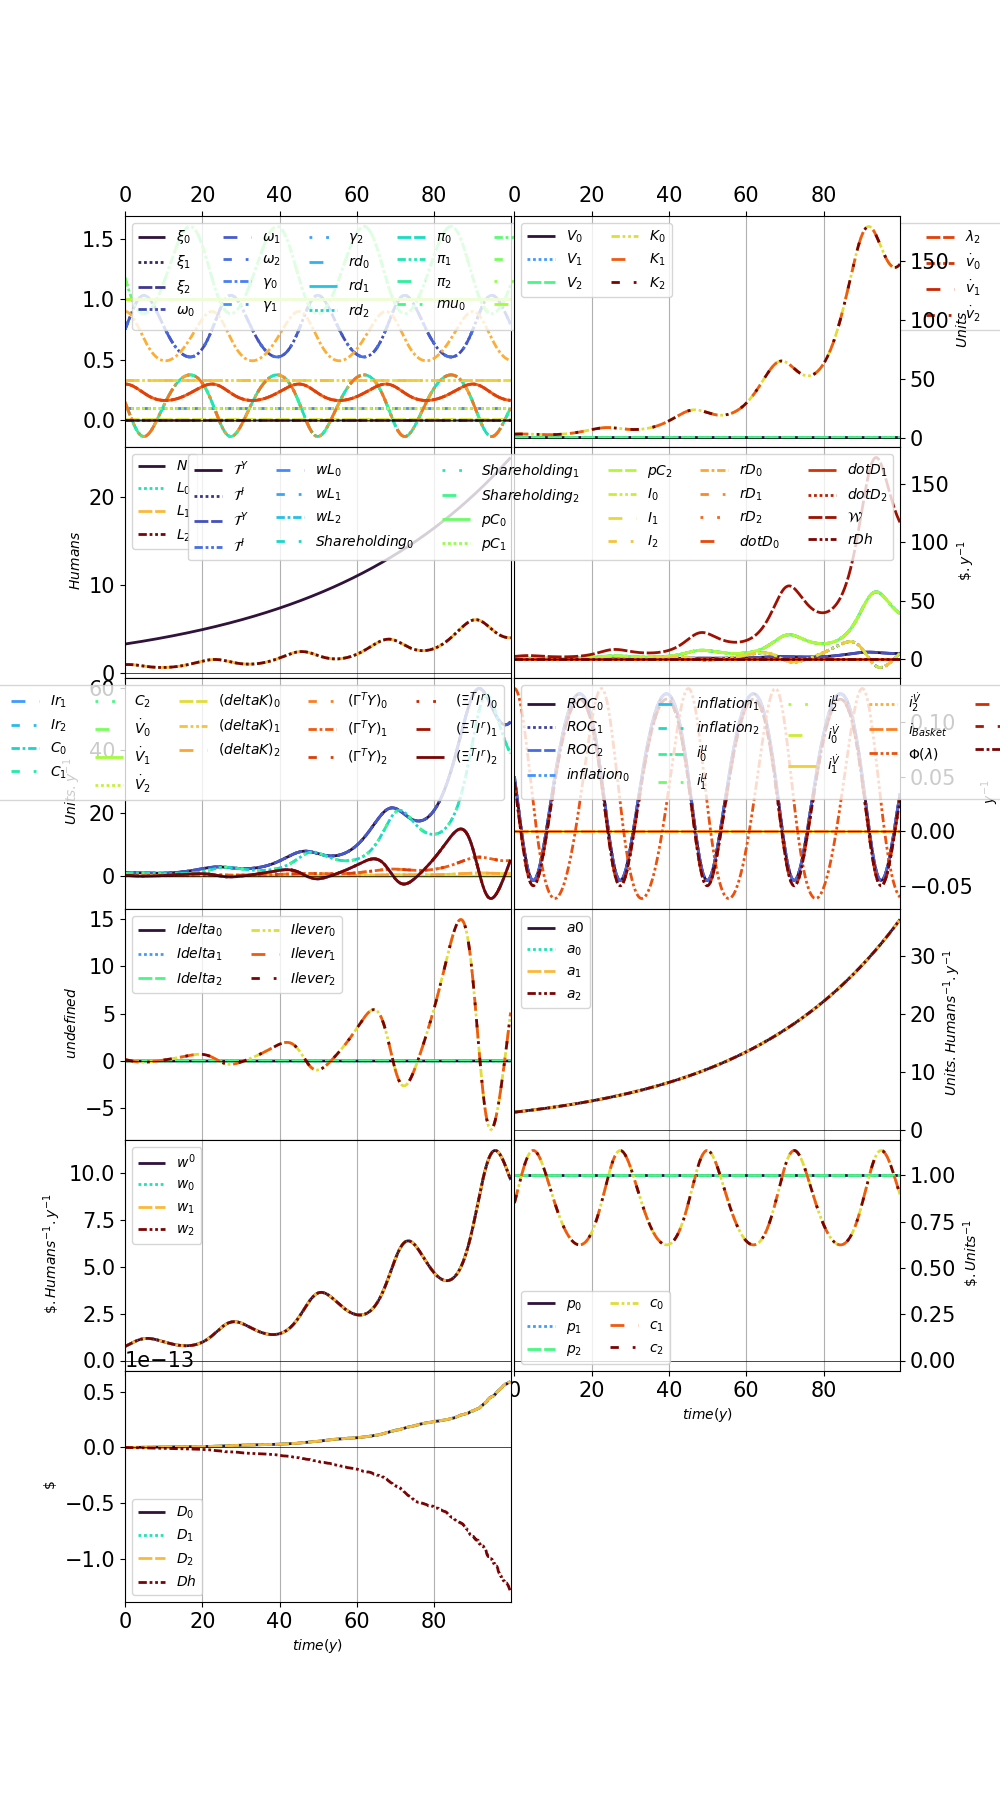

In [56]:
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
#hub.get_summary()

hub.run()
hub.plot()

### Forcing them to be at equilibrium


Changing Dimensions: ['Nprod']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'V', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
Now Nprod has 3 sectors with names ['0', '1', '2']
size         Nprod  list   ['MONO']
  size   ['__ONE__']
  value  1
differential D   func  <function <lambda> at 0x00000247CFA634C0>
  size  ['Nprod']
 Dh  func  <function <lambda> at 0x00000247CFA63EC0>
  size  ['__ONE__']
 V   func  <function <lambda> at 0x00000247CFA63D80>
  size  ['Nprod']
 K   func  <function <lambda> at 0x00000247CFA63380>
  size  ['Nprod']
 p   func  <function <lambda> at 0x00000247CFA60CC0>
  size  ['Nprod']
 w0  func  <function <lambda> at 0x00000247CFA61080>
  size  ['__ONE__']
 a0  func        <function <lambda> at 0x00000247CF9FD8A0>
  definition  Capital unit per worker
  size   

C:\Users\Paul Valcke\Documents\GitHub\GEMMES\pygemmes\_plots\_plots.py:204: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.tight_layout()


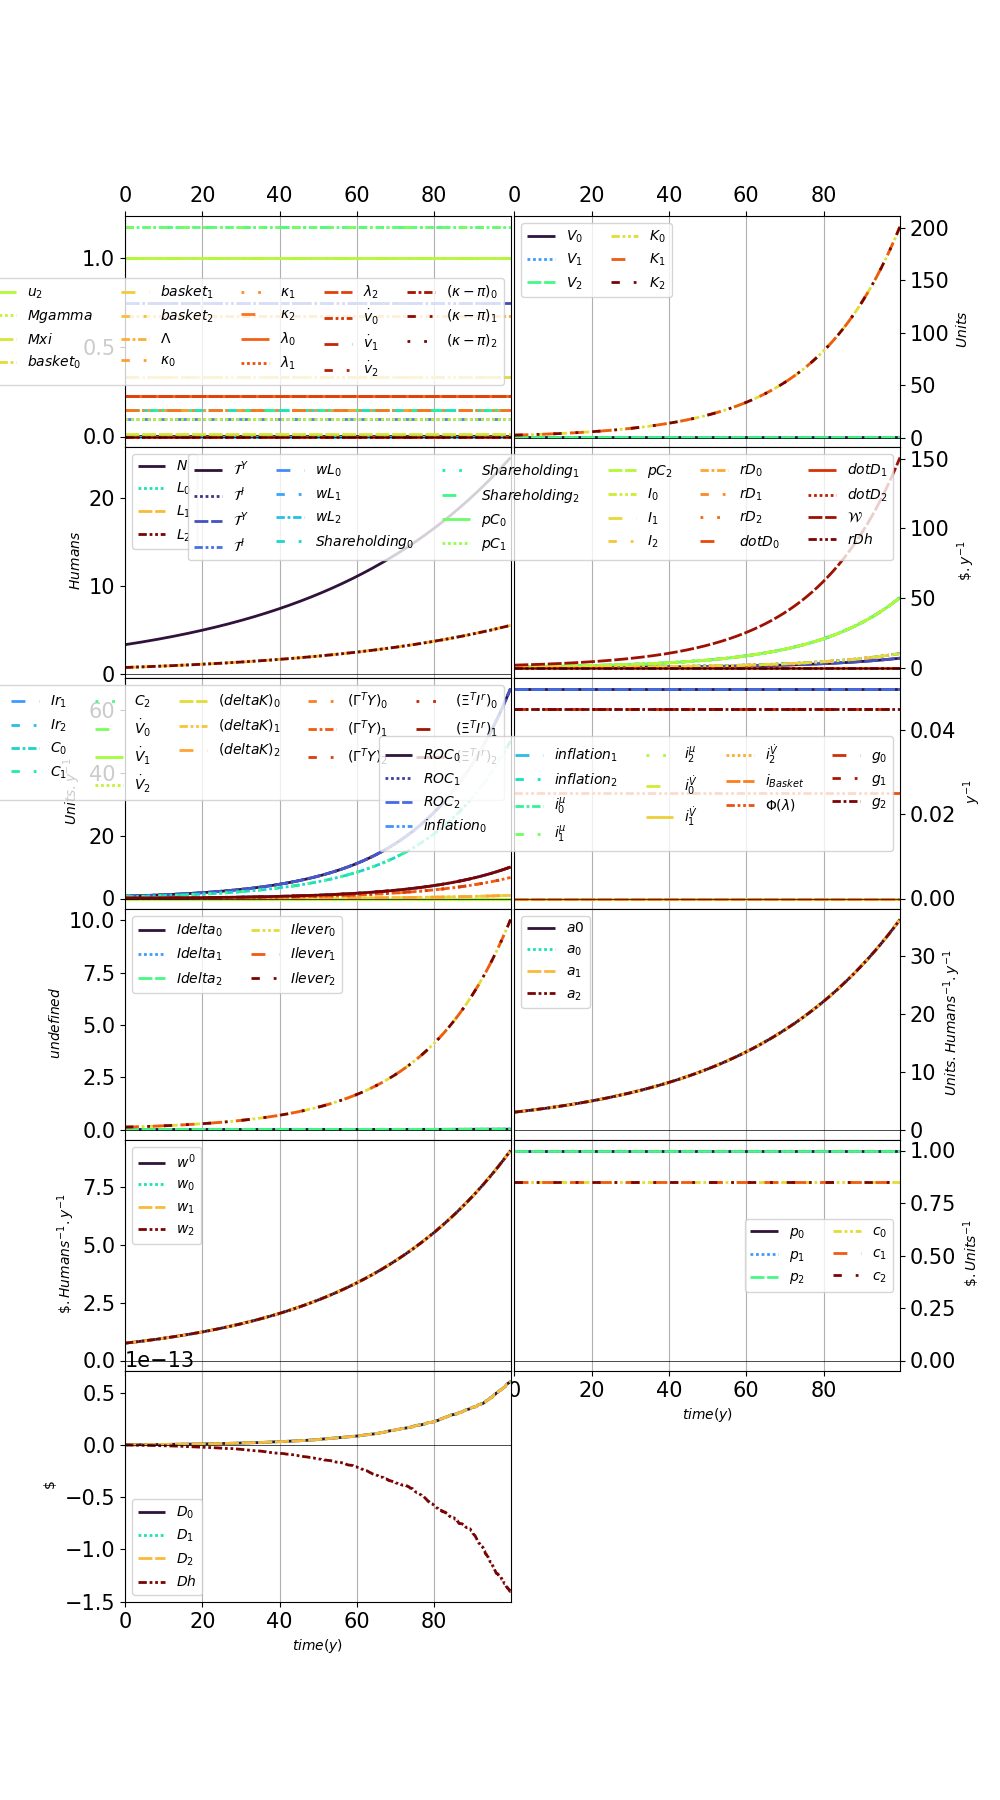

In [43]:
## At equilibrium
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

# FORCING THE EQUILIBRIUM 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 
#hub.get_summary()


hub.run()
hub.plot()

### Desynchronized Goodwin 

In [78]:
## At equilibrium
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

# FORCING THE EQUILIBRIUM 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['V']=dparam0['K']*dparam0['A']*dparam0['epsilonV']
#pprint(dparam0)

# DESYNCHRONISATION 
noise = np.random.normal(1,0.2,size=len(dparam0['Nprod']))
dparam0['K']*= noise

noise2 = np.random.normal(1,0.1,size=len(dparam0['Nprod']))
dparam0['p']*= noise2 

dparam0['Cpond']=noise/(len(dparam0['Nprod']))
dparam0['Cpond']/=np.sum(dparam0['Cpond'])

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',10000,verb=False) 
#hub.get_summary()

hub.run(N=1000)
#hub.plot()
'''
for sector in dparam0['Nprod']:
    pgm.plots.XYZ(hub,['omega',sector],
                      ['employment',sector],
                      ['rd',sector],
                      ['dotV',sector] )


pgm.plots.XYZ(hub,['omega',dparam0['Nprod'][0]],
                    ['omega',dparam0['Nprod'][1]],
                    ['omega',dparam0['Nprod'][2]],
                    'time' )

pgm.plots.XYZ(hub,['employment',dparam0['Nprod'][0]],
                    ['employment',dparam0['Nprod'][1]],
                    ['employment',dparam0['Nprod'][2]],
                    'time' )
'''

pgm.plots.plotnyaxis(hub,[[['employment',dparam0['Nprod'][0]],
                          ['employment',dparam0['Nprod'][1]],
                          ['employment',dparam0['Nprod'][2]]]])
#hub.supplements['PiRepartition'](hub)

KeyError: 'epsilonV'

Tmax       -----------[100.]
Tini       -----------[0.]
dt         -----------[0.1]
Nprod      -----------['0', '1', '2']
N          -----------[3.33333333]
w0         -----------[0.75]
a0         -----------[3.]
D          -----------[0.]
Dh         -----------[0.]
V          -----------[1.]
K          -----------[2.25302061 2.25302061 2.25302061]
p          -----------[1. 1. 1.]
z          -----------[1.]
apond      -----------[1.]
alpha      -----------[0.025]
n          -----------[0.02]
delta      -----------[0.005]
eta        -----------[0.]
mu0        -----------[1.]
chi        -----------[0.]
gammai     -----------[0.]
r          -----------[0.03]
philinConst-----------[-0.292]
philinSlope-----------[0.469]
Delta      -----------[0.]
k0         -----------[0.]
k1         -----------[1.]
A          -----------[0.33333333]
CESexp     -----------[100.]
b          -----------[0.5]
Xi         -----------[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Gamma      -----------[[0.1 0.  0. ]
 [0.  

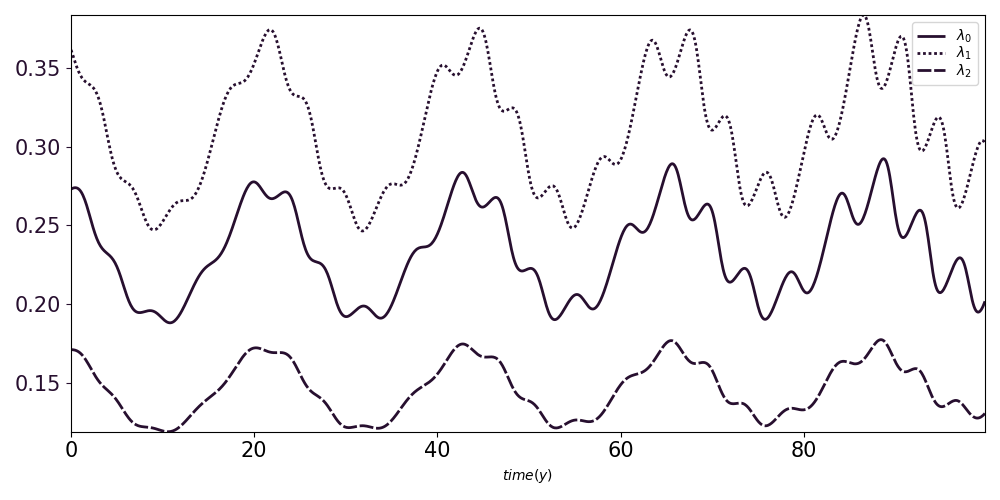

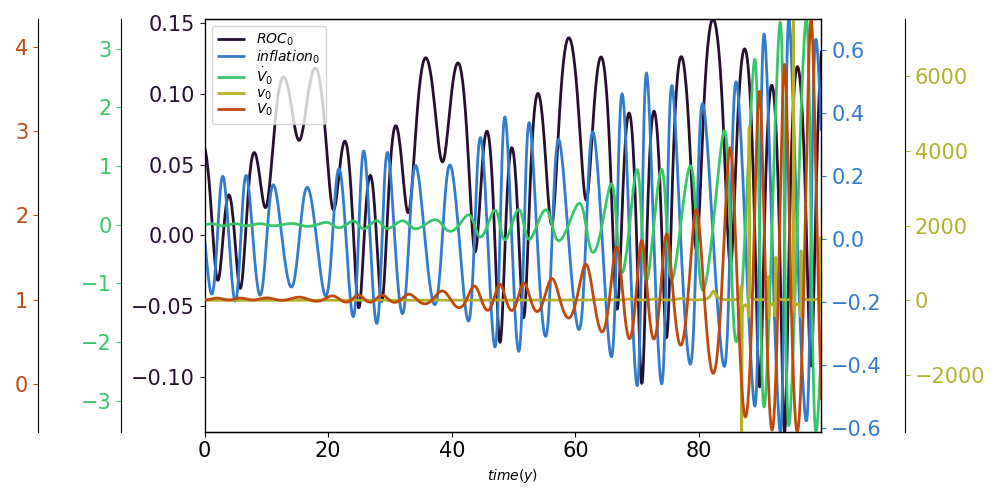

In [86]:
## At equilibrium
hub=pgm.Hub('CHIMES0',verb=False)

# Generating a basic dictionnary of N sectors 
dparam0 = hub.supplements['generateNgoodwin'](3) 

# FORCING THE EQUILIBRIUM 
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # we calculate the equilibrium employment and will deduce K from it
dparam0['p'] = hub.supplements['pForROC'](dparam0) # we calculate prices to force the return on capital to force steady growth

K= hub.supplements['Kfor0dotV'](dparam0) # Scaling of K between sectors
dparam0['K']=K*dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N

pprint(dparam0)

# DESYNCHRONISATION 
noise = np.random.normal(1,0.2,size=len(dparam0['Nprod']))
dparam0['K']*= noise

noise2 = np.random.normal(1,0.1,size=len(dparam0['Nprod']))
dparam0['p']*= noise2 

dparam0['Cpond']=noise/(len(dparam0['Nprod']))
dparam0['Cpond']/=np.sum(dparam0['Cpond'])

dparam0['chi']= 10

hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 


hub.run(N=1000)
#hub.plot()
'''
for sector in dparam0['Nprod']:
    pgm.plots.XYZ(hub,['omega',sector],
                      ['employment',sector],
                      ['rd',sector],
                      ['dotV',sector] )


pgm.plots.XYZ(hub,['omega',dparam0['Nprod'][0]],
                    ['omega',dparam0['Nprod'][1]],
                    ['omega',dparam0['Nprod'][2]],
                    'time' )

pgm.plots.XYZ(hub,['employment',dparam0['Nprod'][0]],
                    ['employment',dparam0['Nprod'][1]],
                    ['employment',dparam0['Nprod'][2]],
                    'time' )
'''

pgm.plots.plotnyaxis(hub,[[['employment',dparam0['Nprod'][0]],
                          ['employment',dparam0['Nprod'][1]],
                          ['employment',dparam0['Nprod'][2]]]])
pgm.plots.plotnyaxis(hub,[[['ROC',dparam0['Nprod'][0]],
                           #['ROC',dparam0['Nprod'][1]],
                           #['ROC',dparam0['Nprod'][2]]
                          ],
                          [['inflation',dparam0['Nprod'][0]],
                           #['inflation',dparam0['Nprod'][1]],
                           #['inflation',dparam0['Nprod'][2]]
                          ],
                          [['dotV',dparam0['Nprod'][0]],
                           #['dotV',dparam0['Nprod'][1]],
                           #['dotV',dparam0['Nprod'][2]]
                          ],
                          [['v',dparam0['Nprod'][0]],
                           #['dotV',dparam0['v'][1]],
                           #['dotV',dparam0['v'][2]]
                          ],
                          [['V',dparam0['Nprod'][0]],
                           #['dotV',dparam0['v'][1]],
                           #['dotV',dparam0['v'][2]]
                          ] ])
#hub.supplements['PiRepartition'](hub)

## Random matrices at equilibrium

We determine randomly :
* the content of the intermediate consumption matrix $\Gamma$
* the content of the capital composition matrix $\Xi$
* the structure of the consumption vector $C^{pond}$ (summing to 1)
* the local wage ponderation $w$
* the local productivity per worker $a$

In [30]:

hub=pgm.Hub('CHIMES0',verb=False)

########################################################
Nsect       = 5     # Number of sectors

gamma0      = 0.1   # Mean intermediate consumption
sigmagamma  = .5    # standard deviation on intermediate consumption

xi0         = 1     # Mean capital size 
sigmaxi     = .5    # standard deviation on capital size

apondscale = .3
wpondscale = .3
########################################################

### GENERATION
dparam0 = hub.supplements['generateNgoodwin'](Nsect) #Basic N Goodwin dictionnary 

# vector equivalent for wage and productivity 
dparam0['apond'] = np.random.normal(1,scale=apondscale,size=Nsect)
dparam0['z']     = np.random.normal(1,scale=wpondscale,size=Nsect)

dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']

### MATRICES AND CONSUMPTION VECTOR (HERE RANDOM)
dparam0['Gamma'] = np.random.lognormal(size=(Nsect,Nsect))   
dparam0['Gamma']*= gamma0/np.sum(dparam0['Gamma'],axis=1)[:, np.newaxis]
dparam0['Gamma']*= (1+np.random.normal(scale=sigmagamma,size=Nsect ))[:, np.newaxis]

dparam0['Xi'] = np.random.lognormal(size=(Nsect,Nsect)) 
dparam0['Xi']*= xi0/np.sum(dparam0['Xi'],axis=1)[:, np.newaxis]
dparam0['Xi']*= (1+np.random.normal(scale=sigmaxi,size=Nsect ))[:, np.newaxis]

dparam0['Cpond'] = np.random.lognormal(size=Nsect) 
dparam0['Cpond']/= np.sum(dparam0['Cpond'])

## Same with fixed values

In [26]:
hub=pgm.Hub('CHIMES0',verb=False)
dparam0 = hub.supplements['generateNgoodwin'](3) #Basic N Goodwin dictionnary
dparam0['a'] = dparam0['a0']*dparam0['apond']
dparam0['w'] = dparam0['w0']*dparam0['z']
dparam0['Nprod']= ['Consumption','Intermediate','Investment']
dparam0['Gamma']= [[0. ,0.1,0],
                   [0. ,0.1,0],
                   [0. ,0.1,0]]
dparam0['Xi']   = [[0. ,0. ,1],
                   [0. ,0. ,1],
                   [0. ,0. ,1]]
dparam0['Cpond'] = np.array([1,0,0])

In [29]:
### Employment to no wage share change through Philips curve
dparam0['employment']= (dparam0['alpha']-dparam0['philinConst'])/dparam0['philinSlope'] # Linear Philips
#dparam0['employment']= 1 - np.sqrt(dparam0['phi1']/(dparam0['phi0']+dparam0['alpha'])) # Divergent Philips

### Price to ensuire ROC to be the natural growth rate of society
dparam0['p'] = hub.supplements['pForROC'](dparam0)
dparam0['p']*=1.1
### Capital composition to be sure that dotV=0 then scaling for employment and N 
K= hub.supplements['Kfor0dotV'](dparam0)
K*=dparam0['employment']*dparam0['N']/np.sum(K/dparam0['a']) # homotetic scaling for employment and N
dparam0['K']= K



In [33]:
dparam0['chi']=0.01


Changing Dimensions: ['Nprod', 'nx', 'nr']
Changing Fields: ['Tini', 'N', 'w0', 'a0', 'D', 'Dh', 'V', 'K', 'p', 'z', 'apond', 'alpha', 'n', 'delta', 'eta', 'mu0', 'chi', 'gammai', 'r', 'philinConst', 'philinSlope', 'Delta', 'k0', 'k1', 'CESexp', 'b', 'Xi', 'Gamma', 'Cpond']
Changes Ignored:['A', 'sigma', 'a', 'w', 'employment', 'Tmax', 'dt']
ISSUE : YOU CHANGE nx while K has specific values on it
ISSUE : YOU CHANGE nx while Gamma has specific values on it
ISSUE : YOU CHANGE nx while Xi has specific values on it
ISSUE : YOU CHANGE nx while Cpond has specific values on it
Now Nprod has 3 sectors with names ['Consumption', 'Intermediate', 'Investment']
Now nx has 1 sectors with names ['']
Now nr has 1 sectors with names ['']
Identified chi as a value change on all axes

time step 713 / 1000
time step 1000 / 1000


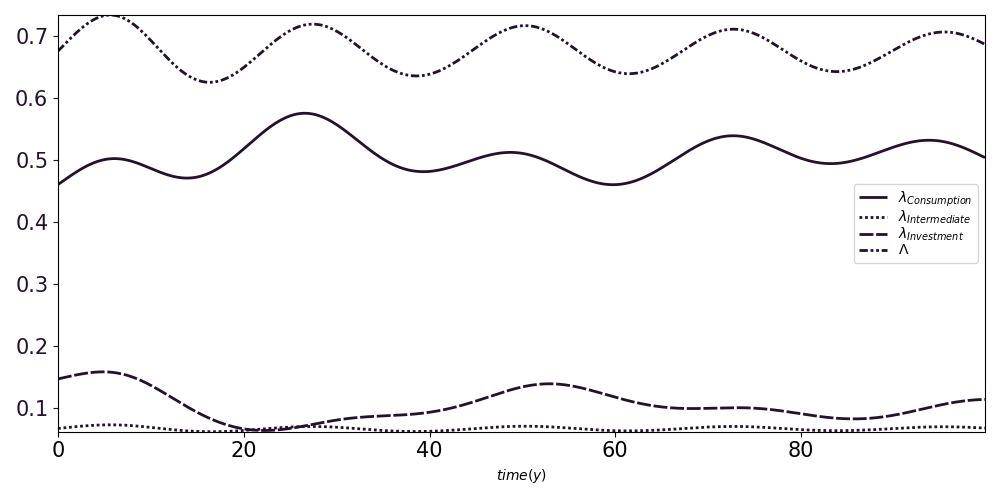

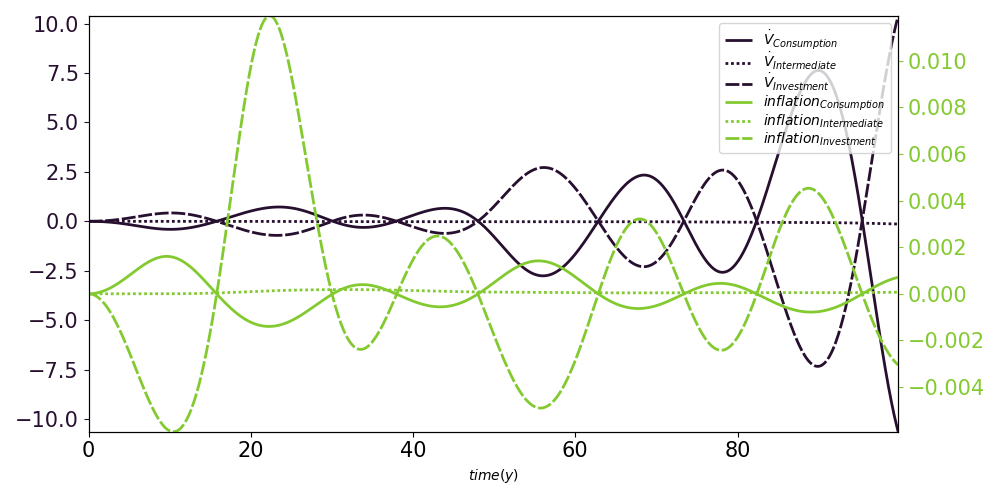

In [34]:
# RUN AND PLOT 
hub.set_dparam(**dparam0,verb=True) 
hub.set_dparam('Tmax',100,verb=False) 

hub.run()
#hub.plot()
#hub.supplements['PiRepartition'](hub)
#hub.supplements['PhysicalFluxes'](hub)
#hub.supplements['MonetaryFluxes'](hub)
pgm.plots.Sankey(hub)

#print([['employment',i] for i in hub.dparam['Nprod']['list']])
# Looking at employment variation
pgm.plots.plotnyaxis(hub,y=[[['employment',i] for i in hub.dparam['Nprod']['list']]+['employmentAGG']])
pgm.plots.plotnyaxis(hub,y=[[['dotV',i] for i in hub.dparam['Nprod']['list']],
                            [['inflation',i] for i in hub.dparam['Nprod']['list']]])